# Exercise 2.4

In [1]:
import sys, pandas as pd, seaborn as sns
sys.executable, pd.__version__, sns.__version__


('/Users/ryumugil/Desktop/Matplotlib Visualization Project/venv310/bin/python',
 '1.5.1',
 '0.12.1')

### 1. Import Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.  Read the latest Weather and Bike data

In [ ]:
df = pd.read_csv(
    "citibike_weather_2022.csv",
    low_memory=False
)

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,PRCP,TMAX,TMIN,duration_min
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,0.0,-4.9,-9.3,8.801183
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,0.0,5.6,-3.2,10.821000
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,0.0,-1.0,-6.0,13.868850
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,0.0,3.9,-4.3,35.037133
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,0.0,-1.0,-9.9,20.573850


In [5]:
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'PRCP', 'TMAX', 'TMIN'],
      dtype='object')

In [6]:
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce")
df["ended_at"] = pd.to_datetime(df["ended_at"], errors="coerce")

df["duration_min"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60
df = df[df["duration_min"].between(0, 180)]  


### 3.Theme and Set of all Plots

In [15]:
sns.set_theme(style="whitegrid", palette="Set2")


### 4. Bar chart of Top 20 starting stations

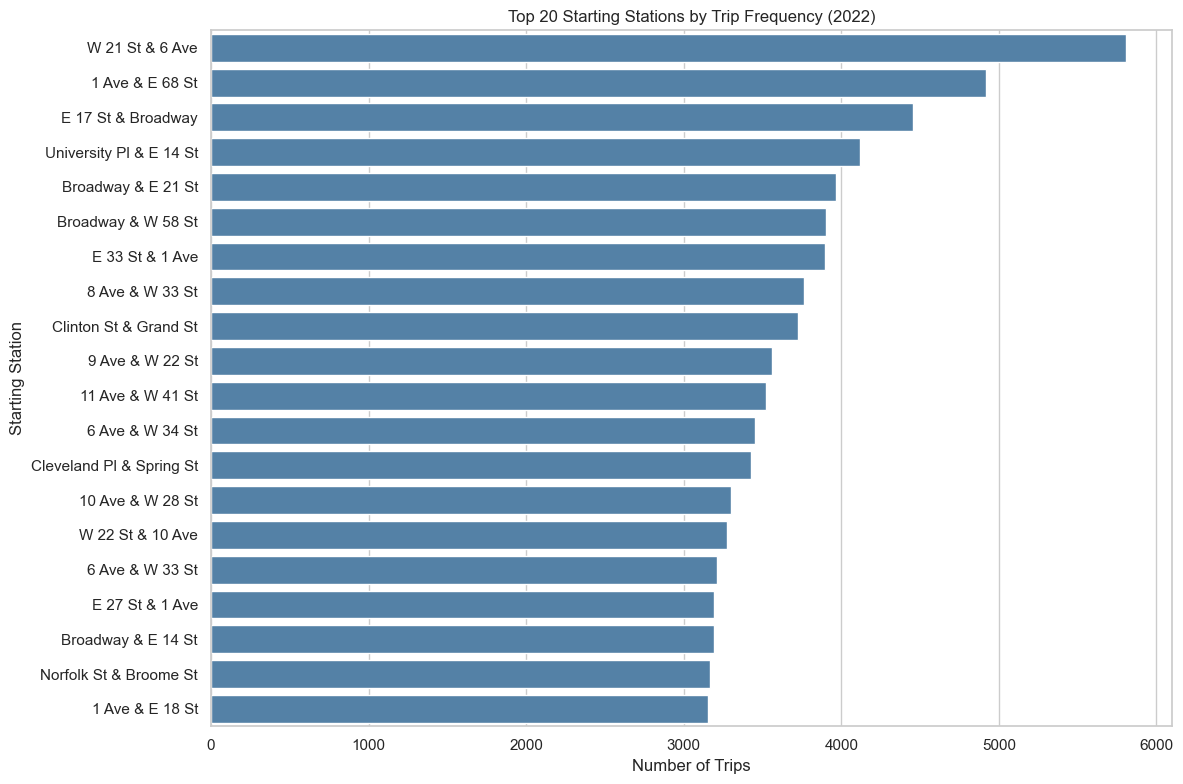

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top_20,
    x="trip_count",
    y="start_station_name",
    color="steelblue"   # temporary override
)

ax.set_title("Top 20 Starting Stations by Trip Frequency (2022)")
ax.set_xlabel("Number of Trips")
ax.set_ylabel("Starting Station")
plt.tight_layout()
plt.show()


The global Set2 categorical palette does not work well for this plot because it contains fewer distinct colors than the number of categories displayed, causing colors to repeat. Since color does not encode additional meaning in this frequency bar chart, a single-color or sequential palette provides better clarity and avoids visual confusion. Therefore, the style for this specific plot was temporarily adjusted.

In [12]:
# Ensure date is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Average daily temperature
df["TAVG"] = (df["TMAX"] + df["TMIN"]) / 2

# Aggregate by day
daily = (
    df.dropna(subset=["date"])
      .groupby("date")
      .agg(
          trips=("ride_id", "size"),
          avg_temp=("TAVG", "mean")
      )
      .reset_index()
      .sort_values("date")
)


### 5. Create the dual axis line plot(seaborn + matplolib)

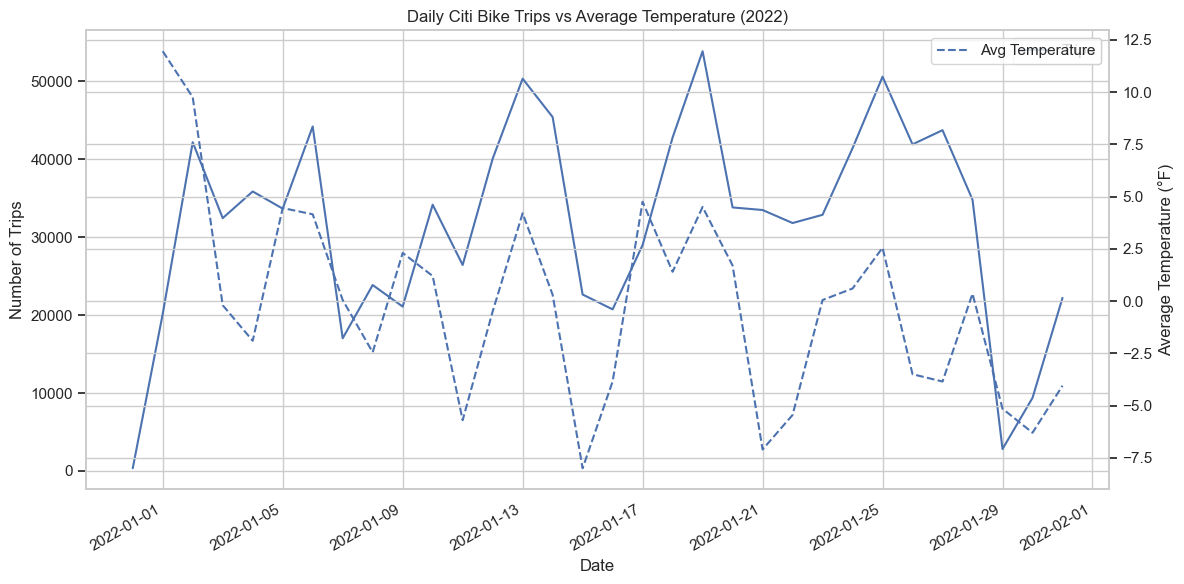

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Left axis: trip counts (seaborn) ---
sns.lineplot(
    data=daily,
    x="date",
    y="trips",
    ax=ax1,
    label="Trips"
)

ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Trips")

# --- Right axis: temperature (seaborn on twinx) ---
ax2 = ax1.twinx()

sns.lineplot(
    data=daily,
    x="date",
    y="avg_temp",
    ax=ax2,
    label="Avg Temperature",
    linestyle="--"
)

ax2.set_ylabel("Average Temperature (°F)")

# --- Title + layout ---
plt.title("Daily Citi Bike Trips vs Average Temperature (2022)")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


### 6. Create Boxplot of the Categorical Variables 

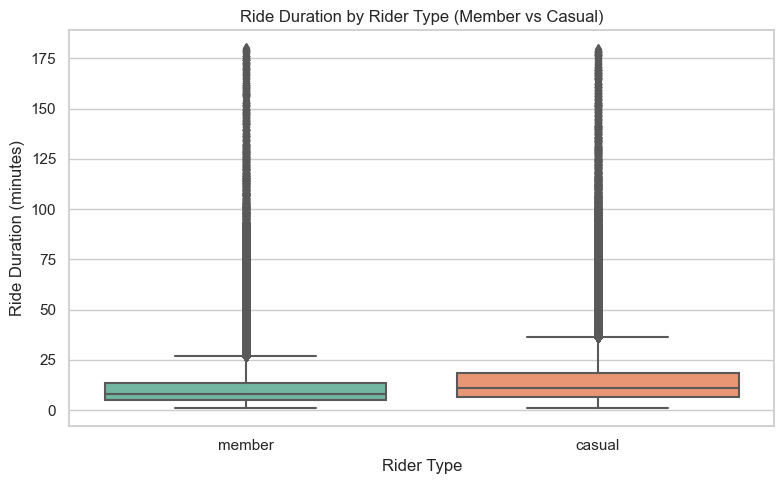

In [16]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=df,
    x="member_casual",
    y="duration_min"
)

ax.set_title("Ride Duration by Rider Type (Member vs Casual)")
ax.set_xlabel("Rider Type")
ax.set_ylabel("Ride Duration (minutes)")
plt.tight_layout()
plt.show()


The box plot shows clear differences in ride duration between member and casual riders. Casual riders have a higher median ride duration and a wider interquartile range, indicating longer and more variable trips. They also display more extreme outliers, suggesting that casual users are more likely to take un long rides. In contrast, member rides are more tightly clustered around shorter durations, reflecting more consistent, and commute oriented usage. ln conclusion, the plot suggests that rider type strongly influences trip duration.

In [19]:
# Make sure started_at is datetime
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce")

# Create season column
df["month"] = df["started_at"].dt.month

def season(m):
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = df["month"].apply(season)

# quick check
df[["started_at", "month", "season"]].head()


,started_at,month,season
0,2022-01-21 13:13:43.392,1,Winter
1,2022-01-10 11:30:54.162,1,Winter
2,2022-01-26 10:52:43.096,1,Winter
3,2022-01-03 08:35:48.247,1,Winter
4,2022-01-22 14:14:23.043,1,Winter


### 7. Create FacetGrid

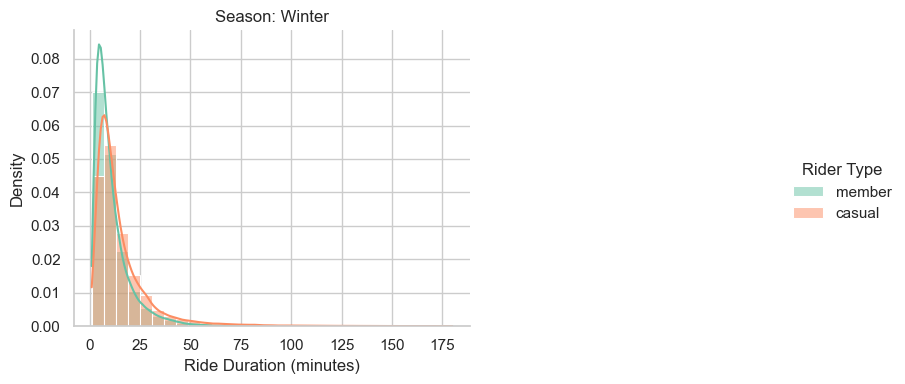

In [20]:
grid = sns.FacetGrid(
    df,
    col="season",
    hue="member_casual",
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

grid.map(
    sns.histplot,
    "duration_min",
    bins=30,
    stat="density",
    common_norm=False,
    kde=True
)

grid.add_legend(title="Rider Type")
grid.set_axis_labels("Ride Duration (minutes)", "Density")
grid.set_titles("Season: {col_name}")

plt.tight_layout()
plt.show()


The FacetGrid separates ride duration distributions by season, making it easier to compare rider behavior across time. Casual riders show longer and more variable ride durations in warmer seasons, particularly in summer, while member rides remain more tightly clustered across all seasons. The grid layout supports this comparison by standardizing axes and highlighting seasonal shifts in distribution shape.